In [21]:
%matplotlib widget
from bmcs_cross_section.api import MKappa
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
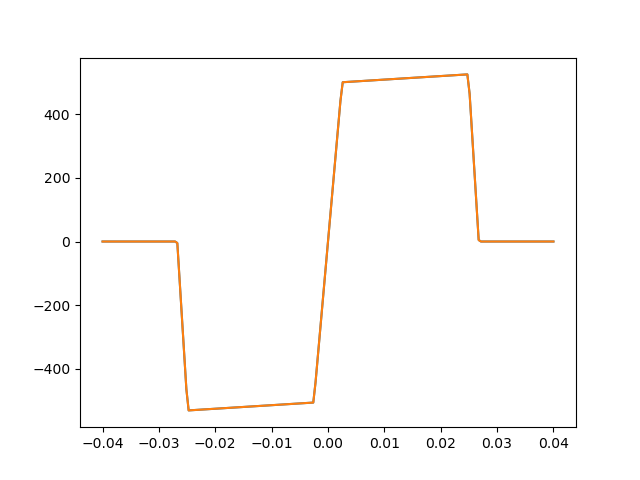

In [27]:
# Steel with hardening
eps = sp.Symbol('eps', real=True)

eps_sy, eps_ud, E_s = sp.symbols(r'varepsilon_sy, varepsilon_ud, E_s', real=True, nonnegative=True)

f_st = 525 # k * f_sy; where k is ductility factor, for A steel k=1.05, for B steel k=1.08 
ext = 0.7 # extension percentage after failure to avoid numerical solution instability
f_sy = E_s * eps_sy
sig = sp.Piecewise(
    (0, eps < -eps_ud - ext * eps_sy),
    (-(E_s / ext) * (eps_ud + ext * eps_sy + eps), eps < -eps_ud),
    (-f_sy + ((eps-eps_sy)/(eps_ud-eps_sy))*(f_st-f_sy), eps < -eps_sy),
    (E_s * eps, eps < eps_sy),
    (f_sy + ((eps-eps_sy)/(eps_ud-eps_sy))*(f_st-f_sy), eps < eps_ud),
    ((E_s / ext) * (eps_ud + ext * eps_sy - eps), eps < eps_ud + ext * eps_sy),
    (0, True),
)

eps_values = np.linspace(-0.04, 0.04, 200)
sig_eps = sig.subs({E_s:200000, eps_sy: 500/200000, eps_ud:0.025})
get_sig = sp.lambdify(eps, sig_eps, 'numpy')
plt.plot(eps_values, get_sig(eps_values))
plt.show()

In [2]:
kappa = sp.Symbol('kappa', real=True)
eps_top = sp.symbols('varepsilon_top', real=True)
eps_bot = sp.symbols('varepsilon_bot', real=True)
b, h, z = sp.symbols('b, h, z', real=True, nonnegative=True)
eps_sy, E_s = sp.symbols('varepsilon_sy, E_s', real=True, nonnegative=True)
eps = sp.Symbol('varepsilon', real=True)
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
# -------------------------------------------------------------------------
# Model parameters
# -------------------------------------------------------------------------
E_ct, E_cc, eps_cr, eps_tu, mu = sp.symbols(
    r'E_ct, E_cc, varepsilon_cr, varepsilon_tu, mu', real=True,
    nonnegative=True
)
eps_cy, eps_cu = sp.symbols(
    r'varepsilon_cy, varepsilon_cu',
    real=True, nonpositive=True
)

l = sp.Line(sp.Point(eps_cr, E_ct * eps_cr), sp.Point(0, eps_tu))
    
sig_c_eps = sp.Piecewise(
    (0, eps < eps_cu),
    (E_cc * eps_cy, eps < eps_cy),
    (E_cc * eps, eps < 0),
    (E_ct * eps, eps < eps_cr),
#     (E_ct*eps - eps*eps_tu/eps_cr + eps_tu, eps < eps_tu),
    (mu*E_ct*eps_cr - ((eps - eps_cr)/(eps_tu-eps_cr))*(mu*E_ct*eps_cr), eps < eps_tu),
    (0, True)
)

# sp.solve(l.equation().subs({x:eps}), y)[0]

eps_values = np.linspace(-0.01, 0.01, 200)
sig_c_eps = sig_c_eps.subs({E_cc:50000, E_ct: 50000, eps_cr:0.001, eps_cu: -0.01, eps_cy:-0.003, eps_tu: 0.003, mu:0.4})
get_sig = sp.lambdify(eps, sig_c_eps, 'numpy' )
plt.plot(eps_values, get_sig(eps_values))
# plt.show()
plt.axhline(y=0, color='r', linestyle='-')
(mu*E_ct*eps_cr - ((eps - eps_cr)/(eps_tu-eps_cr))*(mu*E_ct*eps_cr)).simplify()
mu*E_ct*eps_cr*(eps-eps_tu)/(eps_cr-eps_tu)

E_ct*mu*varepsilon_cr*(varepsilon - varepsilon_tu)/(varepsilon_cr - varepsilon_tu)

In [10]:
73 * 30**0.18 / 1000 # -> N/mm

0.13464948167793725

In [11]:
0.028 * (30**0.18) * 20**0.32

0.13470057692070922

14.2759158362211*exp(-2167.03610227259*varepsilon)


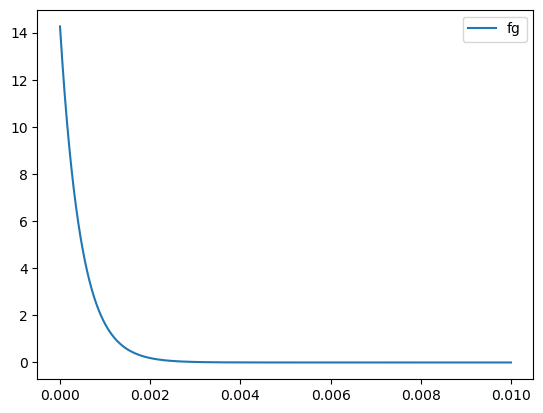

In [4]:
# Tension with softening
fig, ax = plt.subplots()
# L_cb is crack band width (or finite length of the softening zone)
eps, eps_f, f_ctm, G_f, f_cm, L_cb = sp.symbols('varepsilon, varepsilon_f, f_ctm, G_f, f_cm, L_cb', real=True, nonnegative=True)

# for eps_f_value in np.linspace(0.0001, 0.01, 10):
#     sig_c_eps = f_ctm*sp.exp(-eps/eps_f)
#     sig_c_eps = sig_c_eps.subs({f_ctm:6, eps_f:eps_f_value})
#     get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
#     eps_values = np.linspace(0, 0.01, 200)
#     ax.plot(eps_values, get_sig(eps_values), label=str(eps_f_value))

E_cm = 30000
L_cb = 100 # [mm] finite length of the softening zone
G_F = 0.073 * f_cm**0.18 # [N/mm] f_cm must be in MPa (fib Model Code 2010)
# G_F = 0.028 * (f_cm**0.18) * d_ag**0.32 # Other option with d_ag aggregate diameter
w1 = G_F/f_ctm
eps_crack = (eps-f_ctm/E_cm)
w = eps_crack*L_cb

sig_c_eps = f_ctm*sp.exp(-w/w1)
sig_c_eps = sig_c_eps.subs({f_ctm:6, f_cm : 35, L_cb:50})
print(sig_c_eps)
get_sig = sp.lambdify(eps, sig_c_eps, 'numpy')
eps_values = np.linspace(0, 0.01, 200)
ax.plot(eps_values, get_sig(eps_values), label='fg')
    
ax.legend()
fig

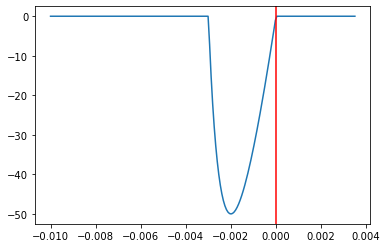

In [8]:
# EC2, eq. (3.14)
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

eps_cy = sp.Symbol('varepsilon_cy', real=True)
eps_cu = sp.Symbol('varepsilon_cu', real=True)
eps = sp.Symbol('varepsilon', real=True)
E_cc = sp.Symbol('E_cc', real=True)

f_cm = sp.Symbol('f_cm', real=True)
# k = sp.Symbol('k', real=True)
# eta = sp.Symbol('eta', real=True)

k = 1.05 * E_cc * sp.Abs(eps_cy) / f_cm
eta = eps / eps_cy
sig_c = f_cm * (k*eta - eta**2)/(1+eta*(k-2))
eps_extra = 0.005
extra_line = sig_c.subs(eps, eps_cu) + sig_c.subs(eps, eps_cu) * (eps - eps_cu) / eps_extra
eps_at_sig_0 = sp.solve(extra_line, eps)[0]
sig_c_eps = -sp.Piecewise(
        # Option 1
        (0, eps < sp.solve(sig_c, eps)[1]),

        # Option 2
#         (0, eps < eps_cu),

        # Option 3
#         (0, eps < eps_at_sig_0),
#         (extra_line, eps < eps_cu),
    
    
        (sig_c, eps < 0),
        (0, True)
    )

eps_values = np.linspace(-0.01, 0.0035, 200)
sig_c_eps = sig_c_eps.subs({E_cc:35654, eps_cy:-0.002, f_cm:50, eps_cu:-0.0035})
# sig_c_eps = sig_c_eps.subs({E_cc:44000, eps_cy:-0.0028, f_cm:98, eps_cu:-0.0028})

get_sig = sp.lambdify(eps, sig_c_eps, 'numpy' )
plt.plot(eps_values, get_sig(eps_values))

# plt.show()
plt.axvline(x=0, color='r', linestyle='-')

-Piecewise((0, varepsilon < -0.0035), (28.3333333333333, varepsilon < -0.00245), (28.3333333333333 - 4720255.44911842*(varepsilon + 0.00245)**2, varepsilon < 0), (0, True))

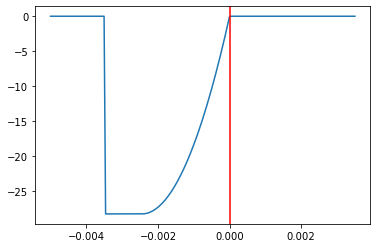

In [3]:
# EC2, eq. (3.17-3.18)

import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

eps_cy = sp.Symbol('varepsilon_cy', real=True)
eps_cu = sp.Symbol('varepsilon_cu', real=True)
eps = sp.Symbol('varepsilon', real=True)
E_cc = sp.Symbol('E_cc', real=True)

f_cd = sp.Symbol('f_cd', real=True)
n = sp.Symbol('n', real=True)

sig_c = f_cd * (1-(1- eps/eps_cy)**n)

sig_c_eps = -sp.Piecewise(
        (0, eps < eps_cu), 
        (f_cd, eps < eps_cy),   
        (sig_c, eps < 0),
        (0, True)
    )

eps_values = np.linspace(-0.005, 0.0035, 200)
sig_c_eps = sig_c_eps.subs({E_cc:37000, eps_cy:-0.00245, f_cd:50 * 0.85/1.5, n:2, eps_cu:-0.0035})
# sig_c_eps = sig_c_eps.subs({E_cc:44000, eps_cy:-0.0028, f_cm:98, eps_cu:-0.0028})

get_sig = sp.lambdify(eps, sig_c_eps, 'numpy' )
plt.plot(eps_values, get_sig(eps_values))
# plt.show()
plt.axvline(x=0, color='r', linestyle='-')

sig_c_eps

E_ct*mu*varepsilon_cr*(varepsilon - varepsilon_tu)/(varepsilon_cr - varepsilon_tu)

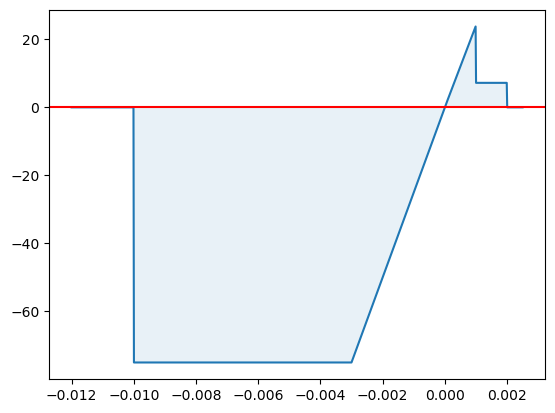

In [4]:
%matplotlib qt

import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
kappa = sp.Symbol('kappa', real=True)
eps_top = sp.symbols('varepsilon_top', real=True)
eps_bot = sp.symbols('varepsilon_bot', real=True)
b, h, z = sp.symbols('b, h, z', real=True, nonnegative=True)
eps_sy, E_s = sp.symbols('varepsilon_sy, E_s', real=True, nonnegative=True)
eps = sp.Symbol('varepsilon', real=True)
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
# -------------------------------------------------------------------------
# Model parameters
# -------------------------------------------------------------------------
E_ct, E_cc, eps_cr, eps_tu, mu = sp.symbols(
    r'E_ct, E_cc, varepsilon_cr, varepsilon_tu, mu', real=True,
    nonnegative=True
)
eps_cy, eps_cu = sp.symbols(
    r'varepsilon_cy, varepsilon_cu',
    real=True, nonpositive=True
)

l = sp.Line(sp.Point(eps_cr, E_ct * eps_cr), sp.Point(0, eps_tu))
    

sig_c_eps = sp.Piecewise(
                (0, eps < eps_cu),
                (E_cc * eps_cy, eps < eps_cy),
                (E_cc * eps, eps < 0),
                (E_ct * eps, eps < eps_cr),
                (mu * E_ct * eps_cr, eps < eps_tu),
                (0, True)  # eps >= eps_tu)
            )

# sp.solve(l.equation().subs({x:eps}), y)[0]

            
eps_values = np.linspace(-0.012, 0.0025, 1000)
sig_c_eps = sig_c_eps.subs({E_cc:25000, E_ct: 24000, eps_cr:0.001, eps_cu: -0.01, eps_cy:-0.003, eps_tu: 0.002, mu:0.3})
get_sig = sp.lambdify(eps, sig_c_eps, 'numpy' )
plt.plot(eps_values, get_sig(eps_values))
plt.fill_between(eps_values, 0, get_sig(eps_values), alpha = 0.1)
# plt.show()
plt.axhline(y=0, color='r', linestyle='-')
(mu*E_ct*eps_cr - ((eps - eps_cr)/(eps_tu-eps_cr))*(mu*E_ct*eps_cr)).simplify()
mu*E_ct*eps_cr*(eps-eps_tu)/(eps_cr-eps_tu)